# Yolo-v4 Implementation for CrowdHuman dataset

In [ ]:
#Install latest opencv to works with yolov4 DNN
!pip install opencv-python --upgrade
#to convert our .names and .data files to unix: Error can't open file
!sudo apt install dos2unix

import os
import matplotlib.pyplot as plt
%matplotlib inline

#Add this shortcut to your drive before proceeding:
https://drive.google.com/drive/folders/1ovKRtsTCiBj9KOJVUwSjUQ907mdLv2ZH?usp=sharing

The darknet folder shortcut should be added in your "My Drive"

In [ ]:
#Mount your drive and please make a shortcut of "darknet" folder shared with you in your "My Drive"

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
%cd drive/My\ Drive/darknet
!ls
!chmod +x ./darknet

# Skip the below steps if drive is mounted and shortcut is made in your drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive

In [16]:
#Clone the implementation of yolo v4
!git clone https://github.com/ash2703/darknet.git
%cd darknet/

Download the yolov4 pre-trained weight files

In [59]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

##Download the CrowdHuman dataset to your drive

Save it in your My Drive: 
https://www.crowdhuman.org/download.html

Save the CrowdHuman_train01.zip and annotation_train.odgt


In [ ]:
import zipfile
#unzip training data from drive and save it in darknet/data/obj
with zipfile.ZipFile("/content/drive/My Drive/CrowdHuman_train01.zip", 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/darknet/data/obj')

Convert the .odgt annotation file in text format for each and every image present in /data/obj

```
Convert from:
<object_id> <left_x> <top_y> <width> <height>
To: 
<object-id> <x_center> <y_center> <width> <height>
```

In [ ]:
!python annotate.py

In [ ]:
#make a copy of yolov4-custom fro us to modify
!cp  '/content/drive/My Drive/darknet/cfg/yolov4-custom.cfg' '/content/drive/My Drive/darknet/cfg/yolo-obj.cfg'

Modify the configuration file(cfg/yolo-obj.cfg)


1. change max_batches to (classes*2000)--> 4000
2. change steps to (0.8*max_batches ,0.9*max_batches) --> 3200,3600
3. Network size = 416,416-->to speed up training
4. Classes = 2 --> person, head, in each [yolo] layer
5. filters=(classes + 5)x3 --> 21, in each [conv] layer above [yolo] layer
6. Create obj.names --> person \n head
7. Create obj.data
    * classes= 2
    * train  = data/train.txt
    * valid = data/val.text #i did not make this for final training
    * names = data/obj.names
    * backup = backup/
8. move obj.names, obj.data in darknet/data













Download pre-trained weights and save in root directory
"/content/drive/My Drive/Fynd/darknet"

Move image and label files in "/content/drive/My Drive/Fynd/darknet/data/obj"

In [42]:
#Check whether all images and text file are properly loaded in /data/obj --> 10,000(5k image + 5k txt)
import os 
print(len(os.listdir('/content/drive/My Drive/darknet/data/obj/Images')))

10001


Generate a text file which has the relative paths of all the training images and store it in /darknet/data/train.txt

Similarly for validation images

In [ ]:
#generate train.txt file containing all training image path
!python generate_test.py

## Training

Before building the project configure the environment to run on GPU
1. Open MAKEFILE
2. Set GPU=1
3. CUDNN=1
4. OPENCV=1

In [35]:
!make  #make clean once if fails

In [36]:
#Convert the txt, names and other requirement files to unix format else cannot be read by model
!dos2unix ./data/train.txt
!dos2unix ./data/obj.data
!dos2unix ./data/obj.names
!dos2unix ./cfg/yolo-obj.cfg

In [37]:
#start training the custom detector
! ./darknet detector train data/obj.data cfg/yolo-obj.cfg yolov4.conv.137 -dont_show

# Testing

In [38]:
#test the model from a validation set image
!./darknet detector test data/obj.data cfg/yolo-obj.cfg backup/yolo-obj_last.weights '/content/drive/My Drive/darknet/Images/284193,ff25000b6a403e9.jpg'

```
detect-human-face.py [-h] -i INPUT [-conf CONFIDENCE]
                            [-iou NMS_THRESHOLD] [-cfg CONFIG] [-w WEIGHTS]

optional arguments:
  -h, --help            show this help message and exit

General:
  -i INPUT, --input INPUT
                        Path to the input image
  -conf CONFIDENCE, --confidence CONFIDENCE
                        Confidence threshold for detection
  -iou NMS_THRESHOLD, --nms_threshold NMS_THRESHOLD
                        Non max suppression threshold
  -cfg CONFIG, --config CONFIG
                        PATH to configuration file
  -w WEIGHTS, --weights WEIGHTS
                        PATH to weights file
```



<class 'float'>
[ WARN:0] global /tmp/pip-req-build-6amqbhlx/opencv/modules/dnn/src/dnn.cpp (1429) setUpNet DNN module was not built with CUDA backend; switching to CPU
class:  person : 0.956061
class:  person : 0.947510
class:  person : 0.934682
class:  person : 0.929092
class:  person : 0.918389
class:  person : 0.895065
class:  person : 0.886842
class:  person : 0.860761
class:  person : 0.855258
class:  person : 0.805137
class:  person : 0.775342
class:  person : 0.530451
class:  head : 0.897125
class:  head : 0.840226
class:  head : 0.805495
class:  head : 0.792406
class:  head : 0.774845
class:  head : 0.755975
class:  head : 0.715945
class:  head : 0.714145
class:  head : 0.672790
class:  head : 0.662699
class:  head : 0.623239
class:  head : 0.592680
class:  head : 0.508105
<Figure size 640x480 with 1 Axes>


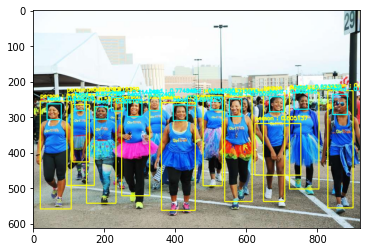

In [57]:
!python detect-human-face.py -i "/content/drive/My Drive/darknet/Images/284193,2276b000b172729c.jpg" -conf 0.5 -iou 0.4

img = plt.imread("prediction.jpg")  #imshow inside the script for some reason
plt.imshow(img)